# Taxi trips from/to Manhattan

In [1]:
import setup

In [2]:
def manhattan(month, start, end):
    return month.loc[(month[start].isin(setup.districts['manhattan'])) & (month['passenger_count'] > 0)][end].value_counts()


def divide_districts(month):
    return [sum(month[zone] for zone in setup.districts[district] if zone in month) for district in setup.districts.keys()]


def sum_up(districts, month):
    return [district + month[i] for i, district in enumerate(districts)]


def percentages(districts):
    return [district / sum(districts) * 100 for district in districts]


def result(manhattan_percentages, districts_manhattan, title):
    print('-------------------- year average --------------------')
    print(manhattan_percentages, '\n\n')
    
    for index in range(12):
        print('--------------------', setup.month_labels[index], '--------------------')
        print(percentages(districts_manhattan[index]), '\n')
    
    fig, ax = setup.plt.subplots(figsize=(10, 10))
    ax.pie(manhattan_percentages, colors=setup.district_colors)
    ax.legend(setup.district_labels, loc=3)
    setup.plt.title(title)
    setup.plt.show()

# From Manhattan

-------------------- year average --------------------
[0.5191639740715591, 2.85312303550071, 93.08556982183165, 3.516072794273696, 0.026070374322380498] 


-------------------- January --------------------
[0.46633233557585974, 2.7477936808130354, 93.60673492628291, 3.1570093623683717, 0.0221296949598258] 

-------------------- February --------------------
[0.46643288525228915, 2.749905838041431, 93.4787973245016, 3.2832651470874734, 0.021598805117215403] 

-------------------- March --------------------
[0.5263888662979351, 2.8085073681476036, 93.06836855518397, 3.5710050962834305, 0.02573011408706656] 

-------------------- April --------------------
[0.525169816215138, 2.8396522091031993, 93.1041538653702, 3.506953876014804, 0.024070233296660592] 

-------------------- May --------------------
[0.5475533769806996, 2.9246713674875306, 92.80472222565248, 3.6981372749137575, 0.02491575496553563] 

-------------------- June --------------------
[0.5390350671772838, 2.932305597775492, 

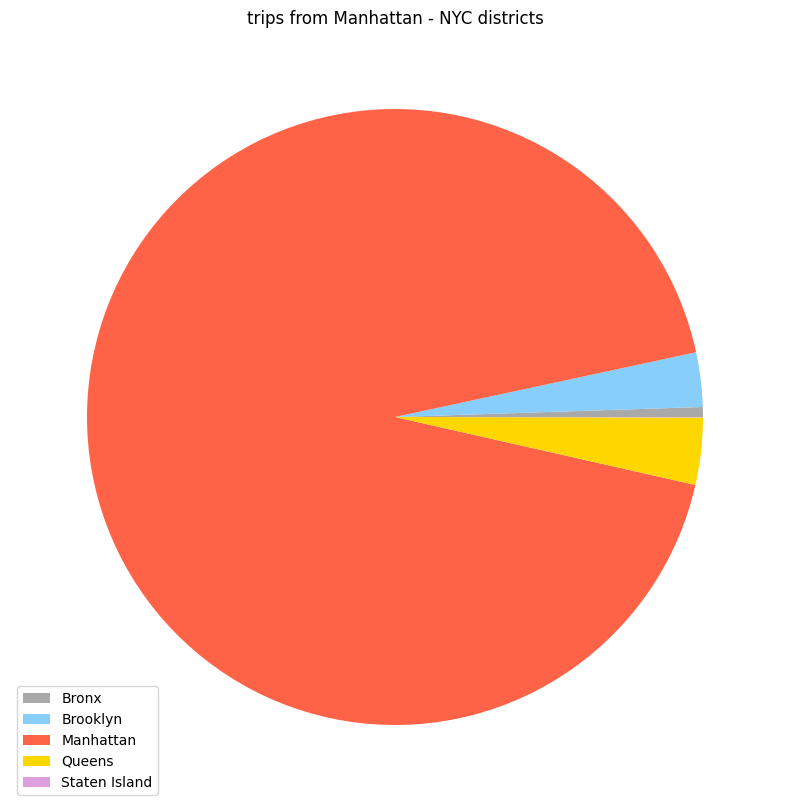

In [3]:
from_manhattan = [divide_districts(manhattan(month, 'PULocationID', 'DOLocationID')) for month in setup.year]
percentages_districts_from_manhattan = [0, 0, 0, 0, 0]

for month in from_manhattan:
    percentages_districts_from_manhattan = [sum(x) for x in zip(percentages_districts_from_manhattan, month)]

result(percentages(percentages_districts_from_manhattan), from_manhattan, 'trips from Manhattan - NYC districts')


# To Manhattan

-------------------- year average --------------------
[0.04891494197859905, 0.41959072925263474, 95.37524596478167, 4.155149664616729, 0.0010986993703717915] 


-------------------- January --------------------
[0.024843867245363322, 0.35140399601357664, 95.76827423897026, 3.8552316622581873, 0.00024623551260401834] 

-------------------- February --------------------
[0.024246580799132667, 0.34388845613627006, 95.88590145257002, 3.745830287523149, 0.00013322297142380585] 

-------------------- March --------------------
[0.04370460530769362, 0.4002440870115217, 95.6212563021399, 3.934116851510061, 0.0006781540308204053] 

-------------------- April --------------------
[0.046273078882105224, 0.4184818504520826, 95.2816303237349, 4.253038173572625, 0.0005765733582871011] 

-------------------- May --------------------
[0.04826222492082638, 0.4452035164675922, 95.10407643346872, 4.401725827386989, 0.0007319977558685748] 

-------------------- June --------------------
[0.04775425355744

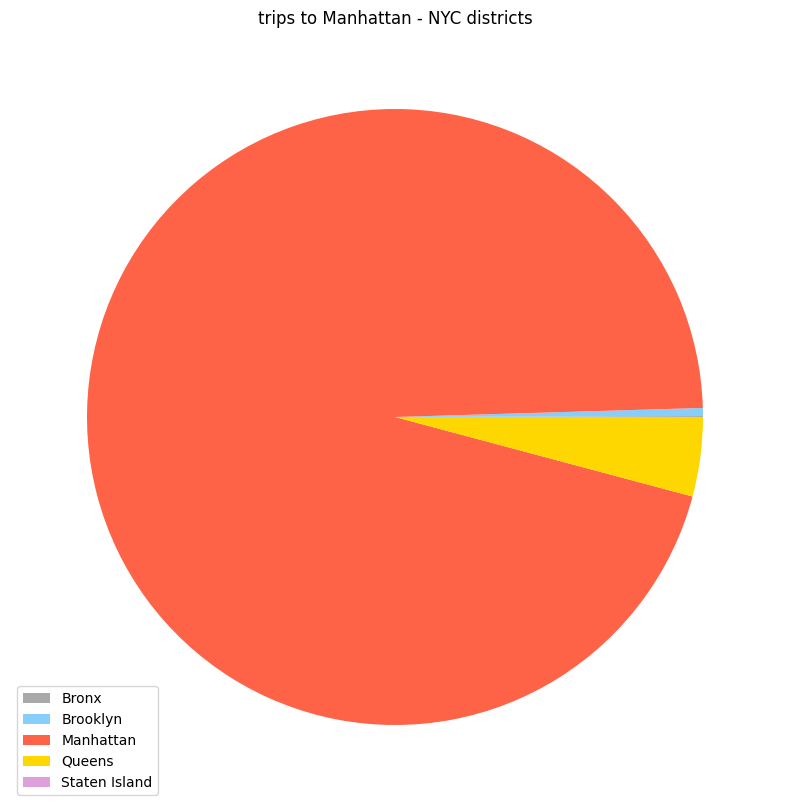

In [4]:
to_manhattan = [divide_districts(manhattan(month, 'DOLocationID', 'PULocationID')) for month in setup.year]
percentages_districts_to_manhattan = [0, 0, 0, 0, 0]

for month in to_manhattan:
    percentages_districts_to_manhattan = [sum(x) for x in zip(percentages_districts_to_manhattan, month)]

result(percentages(percentages_districts_to_manhattan), to_manhattan, 'trips to Manhattan - NYC districts')